In [29]:
%store -r
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None

In [30]:
rides_df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_address,start_zip,start_name,start_docks,end_address,end_zip,end_name,end_docks,charged_ride,start_hour,active_6m,annual,monthly,one_day,walk_up,one_way,round_trip,time_block_count,time_block_count_post_free,x,y
0,33404951,36,2017-07-01 00:09:00,2017-07-01 00:45:00,3018,34.043732,-118.260139,3018,34.043732,-118.260139,5996,0,Round Trip,Walk-up,919 S Grand Ave,90015,Grand & Olympic,22.0,919 S Grand Ave,90015,Grand & Olympic,22.0,1,0,1,0,0,0,1,0,1,2,1,2.207213e+06,229715.372020
1,33404950,13,2017-07-01 00:10:00,2017-07-01 00:23:00,3055,34.044159,-118.251579,3082,34.046520,-118.237411,5777,0,One Way,Walk-up,111 W 7th Street,90014,7th & Main,23.0,599 Traction Ave,90013,Traction & Rose,27.0,0,0,1,0,0,0,1,1,0,1,0,2.208004e+06,229781.805945
2,33404947,34,2017-07-01 00:11:00,2017-07-01 00:45:00,3018,34.043732,-118.260139,3018,34.043732,-118.260139,6342,0,Round Trip,Walk-up,919 S Grand Ave,90015,Grand & Olympic,22.0,919 S Grand Ave,90015,Grand & Olympic,22.0,1,0,1,0,0,0,1,0,1,2,1,2.207213e+06,229715.372020
3,33404948,34,2017-07-01 00:11:00,2017-07-01 00:45:00,3018,34.043732,-118.260139,3018,34.043732,-118.260139,6478,0,Round Trip,Walk-up,919 S Grand Ave,90015,Grand & Olympic,22.0,919 S Grand Ave,90015,Grand & Olympic,22.0,1,0,1,0,0,0,1,0,1,2,1,2.207213e+06,229715.372020
4,33404949,12,2017-07-01 00:11:00,2017-07-01 00:23:00,3055,34.044159,-118.251579,3082,34.046520,-118.237411,6411,0,One Way,Walk-up,111 W 7th Street,90014,7th & Main,23.0,599 Traction Ave,90013,Traction & Rose,27.0,0,0,1,0,0,0,1,1,0,1,0,2.208004e+06,229781.805945


In [31]:
rides_df.shape

(250513, 35)

In [32]:
rides_df.dtypes

trip_id                                int64
duration                               int64
start_time                    datetime64[ns]
end_time                      datetime64[ns]
start_station                          int64
start_lat                            float64
start_lon                            float64
end_station                            int64
end_lat                              float64
end_lon                              float64
bike_id                                int64
plan_duration                          int64
trip_route_category                   object
passholder_type                       object
start_address                         object
start_zip                             object
start_name                            object
start_docks                          float64
end_address                           object
end_zip                               object
end_name                              object
end_docks                            float64
charged_ri

In [33]:
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf
from dask import dataframe as dd
import dask
from functools import partial

from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display
from pyproj import Proj

In [87]:
# Reproject points to state plane
ca = Proj(init = 'epsg:2229')

def reproj(df, prj = ca, lat = "start_lat", lon = "start_lon"):
    d = ca(df[lon].values, df[lat].values)
    df[['x','y']] == pd.DataFrame({'x':d[0],'y':d[1]})
    return df

In [88]:
rides_df['x'] = ca(rides_df['start_lon'].values, rides_df['start_lat'].values)[0]
rides_df['y'] = ca(rides_df['start_lon'].values, rides_df['start_lat'].values)[1]

In [89]:
dask_df = dd.from_pandas(rides_df, npartitions = 3)

In [90]:
dask_df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_address,start_zip,start_name,start_docks,end_address,end_zip,end_name,end_docks,charged_ride,start_hour,active_6m,annual,monthly,one_day,walk_up,one_way,round_trip,time_block_count,time_block_count_post_free,x,y
0,33404951,36,2017-07-01 00:09:00,2017-07-01 00:45:00,3018,34.043732,-118.260139,3018,34.043732,-118.260139,5996,0,Round Trip,Walk-up,919 S Grand Ave,90015,Grand & Olympic,22.0,919 S Grand Ave,90015,Grand & Olympic,22.0,1,0,1,0,0,0,1,0,1,2,1,1.975980e+06,560345.157603
1,33404950,13,2017-07-01 00:10:00,2017-07-01 00:23:00,3055,34.044159,-118.251579,3082,34.046520,-118.237411,5777,0,One Way,Walk-up,111 W 7th Street,90014,7th & Main,23.0,599 Traction Ave,90013,Traction & Rose,27.0,0,0,1,0,0,0,1,1,0,1,0,1.976770e+06,560390.509618
2,33404947,34,2017-07-01 00:11:00,2017-07-01 00:45:00,3018,34.043732,-118.260139,3018,34.043732,-118.260139,6342,0,Round Trip,Walk-up,919 S Grand Ave,90015,Grand & Olympic,22.0,919 S Grand Ave,90015,Grand & Olympic,22.0,1,0,1,0,0,0,1,0,1,2,1,1.975980e+06,560345.157603
3,33404948,34,2017-07-01 00:11:00,2017-07-01 00:45:00,3018,34.043732,-118.260139,3018,34.043732,-118.260139,6478,0,Round Trip,Walk-up,919 S Grand Ave,90015,Grand & Olympic,22.0,919 S Grand Ave,90015,Grand & Olympic,22.0,1,0,1,0,0,0,1,0,1,2,1,1.975980e+06,560345.157603
4,33404949,12,2017-07-01 00:11:00,2017-07-01 00:23:00,3055,34.044159,-118.251579,3082,34.046520,-118.237411,6411,0,One Way,Walk-up,111 W 7th Street,90014,7th & Main,23.0,599 Traction Ave,90013,Traction & Rose,27.0,0,0,1,0,0,0,1,1,0,1,0,1.976770e+06,560390.509618


In [91]:
# dask_df = dask_df.map_partitions(reproj)

In [92]:
d = dask_df.compute()

In [96]:
# Create base map
plot_width = int(1000)
plot_height = int(500)
background = "black"
export = partial(export_image, background = background)
cm = partial(colormap_select, reverse=(background!="black"))
display(HTML(""))

sw = ca(33.899377,-118.590118) # reproj
ne = ca(34.214155, -118.144701) # reproj

LA = x_range, y_range = zip(sw, ne)

cvs = ds.Canvas(plot_width, plot_height, *LA)

In [97]:
count = cvs.points(d, 'x', 'y')

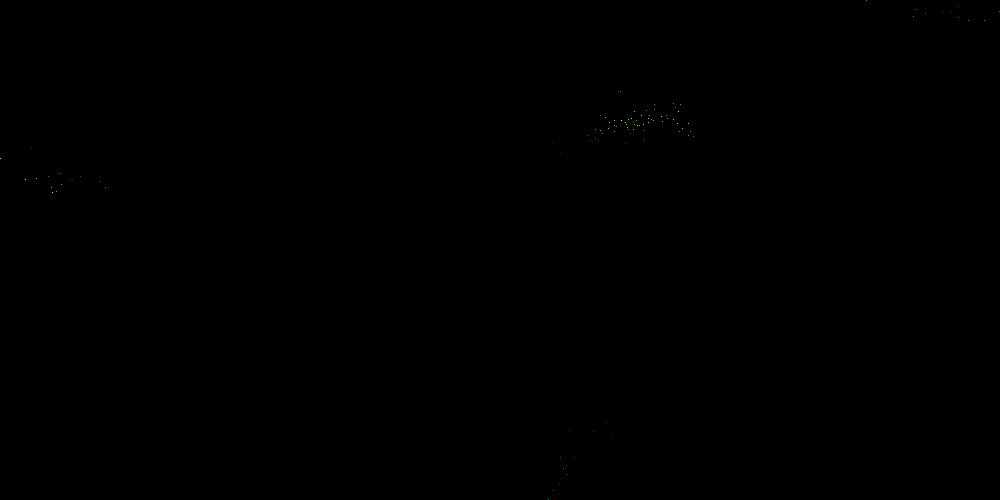

In [98]:
# export(tf.shade(count, cmap = Greys9, how='eq_hist'),'tweets3')
export(tf.shade(count, cmap=viridis, how='eq_hist'), 'colored_total')

(1e+30, 1e+30)

(1e+30, 1e+30)

In [99]:
import holoviews as hv
import geoviews as gv
import datashader as ds
import dask.dataframe as dd
from cartopy import crs

from holoviews.operation.datashader import datashade

hv.extension('bokeh', width=95)

%opts RGB     [width=1200 height=682 xaxis=None yaxis=None show_grid=False] 
%opts Shape (fill_alpha=0 line_width=1.5) [apply_ranges=False tools=['tap']] 
%opts Points [apply_ranges=False] WMTS (alpha=0.5)

ModuleNotFoundError: No module named 'geoviews'